# Data cleaning in machine learning

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [4]:
# pip install distutils
#%pip install distutils
#pip install setuptools

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
imputer=SimpleImputer(strategy='median')
df['age']=imputer.fit_transform(df[['age']])

# Imputation of multi-variate features

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [8]:
imputer=IterativeImputer(max_iter=20,n_nearest_features=5,random_state=0) 
df['age']=imputer.fit_transform(df[['age']])

# Forward and backward fill

In [9]:
df=sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [11]:
# Replace the missing values with forward fill
df['age'] = df['age'].ffill()

In [12]:
# Replace the missing values with backward fill
df['age'] = df['age'].bfill()

# Using KNN Imputer

In [13]:
from sklearn.impute import KNNImputer
# Create an imputer object with a KNN filling strategy
imputer = KNNImputer(n_neighbors=5)
# Fill the missing values using the KNN imputer
df['age'] = imputer.fit_transform(df[['age']])


# Inconsistencies in data

In [14]:
data={"Date":["2020-01-01","01-02-2000","2020-03-01","20-2020-04","2020-01-05","2020-01-06","2020-01-07","2020-01-08","2020-01-09","2020-01-10"],
      "Country":["China","USA","China","America","China","USA","China","United States","China","USA"],
      "Name":["John","Alice","John","Alice","John","Alice","John","Alice","John","Alice"],
      "Sales_2020":[100,200,300,400,500,600,700,800,900,1000],
      "Sales_2021":[120,220,320,420,520,620,720,820,920,1020]}

In [15]:
data=pd.DataFrame(data)
data

,Date,Country,Name,Sales_2020,Sales_2021
0,2020-01-01,China,John,100,120
1,01-02-2000,USA,Alice,200,220
2,2020-03-01,China,John,300,320
3,20-2020-04,America,Alice,400,420
4,2020-01-05,China,John,500,520
5,2020-01-06,USA,Alice,600,620
6,2020-01-07,China,John,700,720
7,2020-01-08,United States,Alice,800,820
8,2020-01-09,China,John,900,920
9,2020-01-10,USA,Alice,1000,1020


In [16]:
data["Date"] = pd.to_datetime(data["Date"], errors='coerce')
data["Date"] = data["Date"].dt.strftime("%Y-%m-%d")
data


,Date,Country,Name,Sales_2020,Sales_2021
0,2020-01-01,China,John,100,120
1,NaN,USA,Alice,200,220
2,2020-03-01,China,John,300,320
3,NaN,America,Alice,400,420
4,2020-01-05,China,John,500,520
5,2020-01-06,USA,Alice,600,620
6,2020-01-07,China,John,700,720
7,2020-01-08,United States,Alice,800,820
8,2020-01-09,China,John,900,920
9,2020-01-10,USA,Alice,1000,1020


In [17]:
# to fill the null vlaues of date column with constant value
data["Date"].fillna("2020-01-01", inplace = True)

In [18]:
# Harmonize the name of the countries
data['Country'].replace({'America': 'United States', 'USA': 'United States'}, inplace=True)


In [19]:
data = pd.DataFrame(data=data)


In [20]:
data = data.drop_duplicates(subset=["Name"])
data

,Date,Country,Name,Sales_2020,Sales_2021
0,2020-01-01,China,John,100,120
1,2020-01-01,United States,Alice,200,220


# Merging of data

In [21]:
data1={"id":[1,2,3,4,5],"Name":["Ali","Abdullah","Ahmed","Sultan","Haider"], "Age":[20,21,22,23,24]}
data1=pd.DataFrame(data1)
data1


,id,Name,Age
0,1,Ali,20
1,2,Abdullah,21
2,3,Ahmed,22
3,4,Sultan,23
4,5,Haider,24


In [22]:
data2={"id":[1,2,3,4,6],"City":["Lahore","Qasur","Karachi","Faislabad","Multan"], "Occupation":["Engineer","Doctor","Teacher","Businessman","Lawyer"]}
data2=pd.DataFrame(data2)
data2

,id,City,Occupation
0,1,Lahore,Engineer
1,2,Qasur,Doctor
2,3,Karachi,Teacher
3,4,Faislabad,Businessman
4,6,Multan,Lawyer


In [23]:
# Merge the two dataframes based on the id
data3 = pd.merge(data1, data2, on='id', how='inner')
data3

,id,Name,Age,City,Occupation
0,1,Ali,20,Lahore,Engineer
1,2,Abdullah,21,Qasur,Doctor
2,3,Ahmed,22,Karachi,Teacher
3,4,Sultan,23,Faislabad,Businessman


# Assignment
Please read the details of 
  1. Left join  
  2. Right join  
  3. Inner join  
  4.  Outer join

# Concatenate different data sets

In [24]:
print(data1)
print(data2)

   id      Name  Age
0   1       Ali   20
1   2  Abdullah   21
2   3     Ahmed   22
3   4    Sultan   23
4   5    Haider   24
   id       City   Occupation
0   1     Lahore     Engineer
1   2      Qasur       Doctor
2   3    Karachi      Teacher
3   4  Faislabad  Businessman
4   6     Multan       Lawyer


In [25]:
# Concatenate both dataframes
data4=pd.concat([data1, data2], axis=0)
data4

,id,Name,Age,City,Occupation
0,1,Ali,20.0,NaN,NaN
1,2,Abdullah,21.0,NaN,NaN
2,3,Ahmed,22.0,NaN,NaN
3,4,Sultan,23.0,NaN,NaN
4,5,Haider,24.0,NaN,NaN
0,1,NaN,NaN,Lahore,Engineer
1,2,NaN,NaN,Qasur,Doctor
2,3,NaN,NaN,Karachi,Teacher
3,4,NaN,NaN,Faislabad,Businessman
4,6,NaN,NaN,Multan,Lawyer


In [26]:
data4=pd.concat([data1, data2], axis=1)
data4

,id,Name,Age,id,City,Occupation
0,1,Ali,20,1,Lahore,Engineer
1,2,Abdullah,21,2,Qasur,Doctor
2,3,Ahmed,22,3,Karachi,Teacher
3,4,Sultan,23,4,Faislabad,Businessman
4,5,Haider,24,6,Multan,Lawyer


# Normalization and Non linear transformation of data

In [27]:
# Generate non normal distributed data (exponential distribution)
data = np.random.exponential(scale=2, size=1000)
data = pd.DataFrame(data, columns=['values'])
data

,values
0,1.481503
1,0.372604
2,1.984083
3,0.038234
4,3.403021
...,...
995,12.329933
996,0.277359
997,2.388245
998,1.857918


In [28]:
data.shape

(1000, 1)

<Axes: xlabel='values', ylabel='Count'>

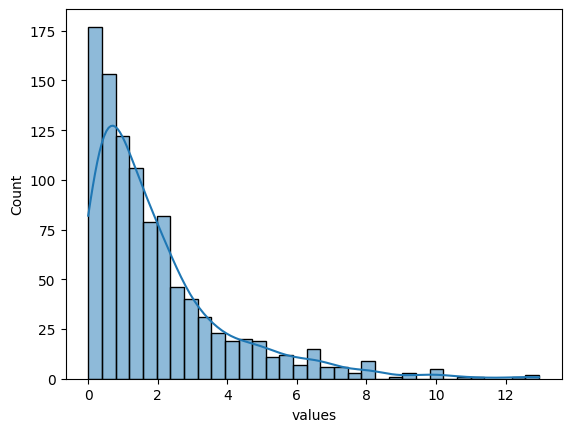

In [29]:
sns.histplot(data['values'], kde=True)

In [30]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
# Create a power transformer object
pt_box_cox = PowerTransformer(method='box-cox') # for non-negative values
pt_yeo_johnson = PowerTransformer(method='yeo-johnson') # for negative values
qt_normal=QuantileTransformer(output_distribution="normal")  # use quantile_transformer for non-gaussian distribution

In [31]:
data.min()

values    0.001548
dtype: float64

In [32]:
data["box_cox"] = pt_box_cox.fit_transform(data[["values"]])


In [33]:
data["yeo_johnson"]=pt_yeo_johnson.fit_transform(data[["values"]])

In [34]:
data["quantile"]=qt_normal.fit_transform(data[["values"]])

In [35]:
data

,values,box_cox,yeo_johnson,quantile
0,1.481503,0.093258,0.109229,0.081638
1,0.372604,-0.965417,-1.094487,-0.953493
2,1.984083,0.370055,0.428119,0.362850
3,0.038234,-2.062969,-1.772001,-2.096521
4,3.403021,0.939748,1.026454,0.930036
...,...,...,...,...
995,12.329933,2.668509,2.288663,2.877846
996,0.277359,-1.146754,-1.261642,-1.149742
997,2.388245,0.556922,0.634104,0.587964
998,1.857918,0.305959,0.355578,0.309743


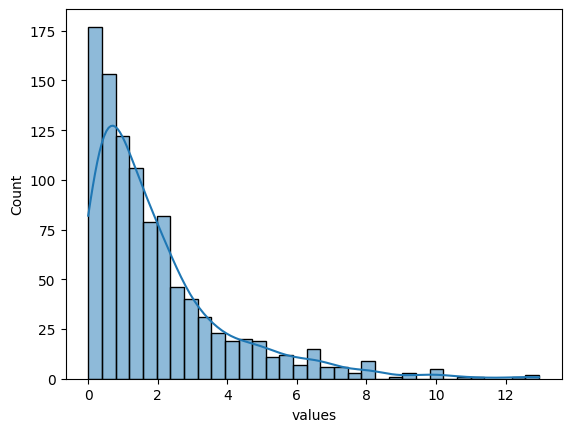

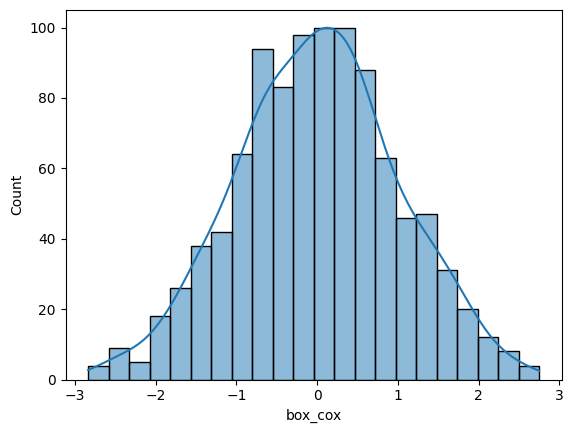

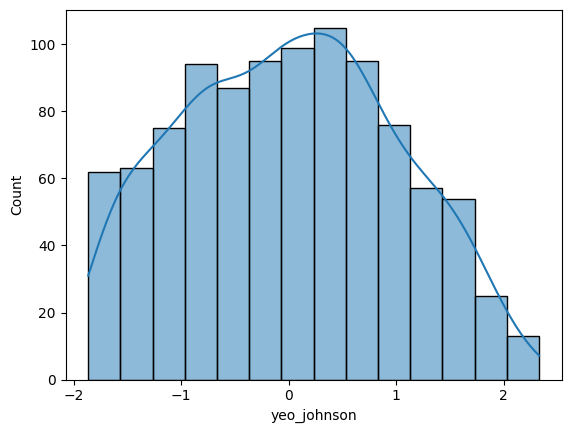

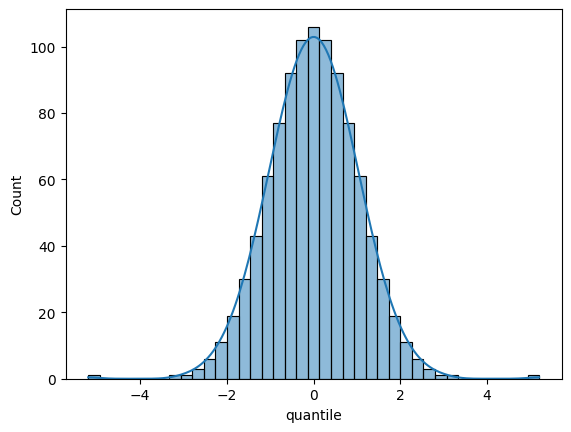

In [36]:
# Check if 'col' exists in the dataframe
for col in data:
    sns.histplot(data[col], kde=True)
    plt.show()



# Assignment: Read complete detail of box_cox and yeo_johnson and quantile distribution

# Normalization

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

L1 normalization is the process of making the sum of the absolute values of each row equal to 1\
L2 normalization is the process of making the sum of the squares of each row equal to 1

In [37]:
from sklearn.preprocessing import Normalizer
X = [[ 1, 1,  1],
     [ 1,  1,  0],
     [ 1,  0, 0]]
X_normalized = Normalizer(norm='l2')

X_normalized

Normalizer()

In [38]:
X_normalized.fit_transform(X)

array([[0.57735027, 0.57735027, 0.57735027],
       [0.70710678, 0.70710678, 0.        ],
       [1.        , 0.        , 0.        ]])

In [39]:
X_normalized = Normalizer(norm='l1')
X_normalized.fit_transform(X)

array([[0.33333333, 0.33333333, 0.33333333],
       [0.5       , 0.5       , 0.        ],
       [1.        , 0.        , 0.        ]])

# Feature encoding

Feature encoding, in the context of machine learning and data preprocessing, refers to the process of converting categorical or text-based features into numerical representations that can be used as input for machine learning algorithms.\
Label encoding\
Ordinal encoding\
one hot encoding\
binary encoding

In [85]:
tip = sns.load_dataset("tips")
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [74]:
print(tip["time"].value_counts())



time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [75]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [54]:

le=LabelEncoder()
tip["encoded_time"] = le.fit_transform(tip["time"])

In [70]:
print(tip["encoded_time"].value_counts())

encoded_time
0    176
1     68
Name: count, dtype: int64


In [71]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_time,encoded_day
0,16.99,1.01,Female,No,2,Dinner,2,0,2
1,10.34,1.66,Male,No,2,Dinner,3,0,2
2,21.01,3.50,Male,No,2,Dinner,3,0,2
3,23.68,3.31,Male,No,2,Dinner,2,0,2
4,24.59,3.61,Female,No,2,Dinner,4,0,2


In [76]:
print(tip["day"].value_counts())

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


In [77]:

# Apply the OrdinalEncoder
oe = OrdinalEncoder(categories=[["Thur", "Fri", "Sat", "Sun"]])


In [78]:
tip["encoded_day"] = oe.fit_transform(tip[["day"]])

In [79]:
tip["encoded_day"].value_counts()

encoded_day
2.0    87
3.0    76
0.0    62
1.0    19
Name: count, dtype: int64

In [87]:
tip["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [88]:
ohe=OneHotEncoder()



In [98]:
ohe.fit_transform(tip[["smoker"]]).toarray()


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [ ]:
pip install category_encoders

In [101]:
from category_encoders import BinaryEncoder

In [106]:
binary_encoder = BinaryEncoder()
binary_encoder=binary_encoder.fit_transform(tip[["day"]])
binary_encoder

,day_0,day_1,day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
239,0,1,0
240,0,1,0
241,0,1,0
242,0,1,0
